In [1]:
import tensorflow as tf
from cleverhans.tf2.attacks import carlini_wagner_l2
import matplotlib.pyplot as plt
import numpy as np

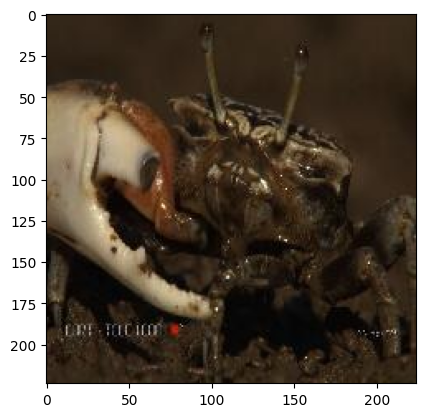

In [2]:
# 加载预训练的ResNet50模型
model = tf.keras.applications.resnet50.ResNet50(weights='imagenet')
# 加载待攻击图像
img_path = '2.JPEG'
img = tf.keras.preprocessing.image.load_img(img_path, target_size=(224, 224))
plt.imshow(img)
plt.show()






In [3]:
import PIL
img = tf.keras.preprocessing.image.img_to_array(img)
img


array([[[51., 39., 25.],
        [51., 39., 25.],
        [51., 39., 25.],
        ...,
        [54., 41., 25.],
        [54., 41., 25.],
        [54., 41., 25.]],

       [[51., 39., 25.],
        [51., 39., 25.],
        [51., 39., 25.],
        ...,
        [54., 41., 25.],
        [54., 41., 25.],
        [54., 41., 25.]],

       [[51., 39., 25.],
        [51., 39., 25.],
        [51., 39., 25.],
        ...,
        [54., 41., 25.],
        [54., 41., 25.],
        [54., 41., 25.]],

       ...,

       [[58., 44., 31.],
        [58., 44., 31.],
        [57., 43., 30.],
        ...,
        [57., 45., 29.],
        [55., 43., 27.],
        [54., 42., 26.]],

       [[52., 38., 25.],
        [54., 40., 27.],
        [54., 40., 27.],
        ...,
        [51., 42., 25.],
        [53., 44., 27.],
        [55., 46., 29.]],

       [[46., 32., 19.],
        [49., 35., 22.],
        [50., 36., 23.],
        ...,
        [45., 36., 19.],
        [51., 42., 25.],
        [56., 47., 30.]]

In [4]:
img.shape

(224, 224, 3)

In [5]:
img_raw = tf.keras.applications.resnet50.preprocess_input(img,data_format="channels_last")

img_raw

array([[[-78.939, -77.779, -72.68 ],
        [-78.939, -77.779, -72.68 ],
        [-78.939, -77.779, -72.68 ],
        ...,
        [-78.939, -75.779, -69.68 ],
        [-78.939, -75.779, -69.68 ],
        [-78.939, -75.779, -69.68 ]],

       [[-78.939, -77.779, -72.68 ],
        [-78.939, -77.779, -72.68 ],
        [-78.939, -77.779, -72.68 ],
        ...,
        [-78.939, -75.779, -69.68 ],
        [-78.939, -75.779, -69.68 ],
        [-78.939, -75.779, -69.68 ]],

       [[-78.939, -77.779, -72.68 ],
        [-78.939, -77.779, -72.68 ],
        [-78.939, -77.779, -72.68 ],
        ...,
        [-78.939, -75.779, -69.68 ],
        [-78.939, -75.779, -69.68 ],
        [-78.939, -75.779, -69.68 ]],

       ...,

       [[-72.939, -72.779, -65.68 ],
        [-72.939, -72.779, -65.68 ],
        [-73.939, -73.779, -66.68 ],
        ...,
        [-74.939, -71.779, -66.68 ],
        [-76.939, -73.779, -68.68 ],
        [-77.939, -74.779, -69.68 ]],

       [[-78.939, -78.779, -71.68 ],
  

In [6]:
# 初始化C&W攻击对象
clip_min =np.array([-103.939, -116.779, -123.68],dtype="float32")
clip_max =np.array( [255 - 103.939, 255 - 116.779, 255 - 123.68],dtype="float32")
cw = carlini_wagner_l2.CarliniWagnerL2(model,targeted=False, confidence=0.5, learning_rate=0.01, binary_search_steps=15, max_iterations=1000, abort_early=True,clip_min=clip_min,clip_max=clip_max)
img.shape



(224, 224, 3)

In [7]:
np.expand_dims(img_raw, axis=0).shape 

(1, 224, 224, 3)

In [8]:
# 执行C&W攻击
img_adv= cw.attack(np.expand_dims(img_raw, axis=0))



In [9]:
img_adv=np.squeeze(img_adv)

In [10]:
img_adv

array([[[-78.96241 , -77.84393 , -72.70311 ],
        [-78.94241 , -77.791084, -72.631195],
        [-78.902466, -77.691795, -72.568344],
        ...,
        [-78.917984, -75.76669 , -69.66965 ],
        [-78.920456, -75.761765, -69.658676],
        [-78.92331 , -75.75674 , -69.65765 ]],

       [[-78.956505, -77.88813 , -72.700836],
        [-78.954575, -77.84925 , -72.6638  ],
        [-78.95344 , -77.82981 , -72.58111 ],
        ...,
        [-78.931786, -75.78032 , -69.658005],
        [-78.94518 , -75.79167 , -69.69016 ],
        [-78.92462 , -75.759674, -69.65719 ]],

       [[-78.97639 , -77.90191 , -72.690155],
        [-78.99385 , -77.887955, -72.638855],
        [-78.94664 , -77.806694, -72.6358  ],
        ...,
        [-78.916336, -75.795685, -69.67485 ],
        [-78.941605, -75.79207 , -69.680435],
        [-78.94479 , -75.78718 , -69.68959 ]],

       ...,

       [[-72.931435, -72.778625, -65.677345],
        [-72.91248 , -72.77902 , -65.66864 ],
        [-73.93057 , -

In [11]:
# 对攻击后生成的对抗样本进行评估
preds = model.predict(np.expand_dims(img_adv,axis=0))

decoded_preds = tf.keras.applications.resnet50.decode_predictions(preds, top=1)[0]
print('Predicted:', decoded_preds)

1/1 [==============================] - 1s 1s/step
Predicted: [('n01990800', 'isopod', 0.4848886)]


In [12]:
from PreprocessTool import resnet50_deprocess
img_adv=resnet50_deprocess(img_adv)
img_adv=PIL.Image.fromarray(img_adv.astype('uint8'))

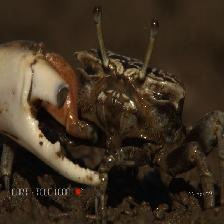

In [13]:
img_adv